In [45]:
import tflearn

In [46]:
from __future__ import division, print_function, absolute_import
import pandas as pd
import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

In [47]:
tweets = pd.read_csv('documents/twcs.csv',encoding='utf-8')
print(tweets.shape)
tweets.head()

(2811774, 7)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [48]:
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]

QnR = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

# Filter to only outbound replies (from companies)
QnR = QnR[QnR.inbound_y ^ True]
print(f'Data shape: {QnR.shape}')
QnR.head()


Data shape: (794299, 14)


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


In [49]:
#making sure the dataframe contains only the needed columns
QnR = QnR[["author_id_x","created_at_x","text_x","author_id_y","created_at_y","text_y"]]
QnR.head(5)

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...


In [50]:
j = QnR.loc[:,["text_x"]] 
j

,text_x
0,@sprintcare is the worst customer service
1,@sprintcare is the worst customer service
2,@sprintcare is the worst customer service
3,@115714 y’all lie about your “great” connectio...
4,"@115714 whenever I contact customer support, t..."
5,actually that's a broken link you sent me and ...
6,"Yo @Ask_Spectrum, your customer service reps a..."
7,My picture on @Ask_Spectrum pretty much every ...
8,somebody from @VerizonSupport please help meee...
9,@VerizonSupport My friend is without internet ...


In [51]:
QnR

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...
5,115716,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,Ask_Spectrum,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...
6,115717,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",Ask_Spectrum,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio..."
7,115718,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,Ask_Spectrum,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...
8,115719,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,VerizonSupport,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...
9,115720,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,VerizonSupport,Tue Oct 31 22:13:30 +0000 2017,@115720 Have your friend message us.\n^ACM


In [52]:
#Lower case removal

QnR["text_x"] = QnR["text_x"].apply(lambda x: " ".join(x.lower() for x in x.split()))
QnR["text_x"].head()

0            @sprintcare is the worst customer service
1            @sprintcare is the worst customer service
2            @sprintcare is the worst customer service
3    @115714 y’all lie about your “great” connectio...
4    @115714 whenever i contact customer support, t...
Name: text_x, dtype: object

In [53]:
QnR["text_x"]

0                 @sprintcare is the worst customer service
1                 @sprintcare is the worst customer service
2                 @sprintcare is the worst customer service
3         @115714 y’all lie about your “great” connectio...
4         @115714 whenever i contact customer support, t...
5         actually that's a broken link you sent me and ...
6         yo @ask_spectrum, your customer service reps a...
7         my picture on @ask_spectrum pretty much every ...
8         somebody from @verizonsupport please help meee...
9         @verizonsupport my friend is without internet ...
11                   @115722 is the worst isp i’ve ever had
12        .@verizonsupport @115725 @115726 &gt;all of ve...
13                  @115725 fix your app it won't even open
14        @chipotletweets @28 i don't fit in my veggie b...
16        @chipotletweets messed up today and didn’t giv...
17        hey @chipotletweets wanna come to mammoth. i'l...
18        when you're the only one in co

In [54]:
QnR["text_x"] = [w.lower() for w in QnR["text_x"]]

In [55]:
QnR["text_x"] 

0                 @sprintcare is the worst customer service
1                 @sprintcare is the worst customer service
2                 @sprintcare is the worst customer service
3         @115714 y’all lie about your “great” connectio...
4         @115714 whenever i contact customer support, t...
5         actually that's a broken link you sent me and ...
6         yo @ask_spectrum, your customer service reps a...
7         my picture on @ask_spectrum pretty much every ...
8         somebody from @verizonsupport please help meee...
9         @verizonsupport my friend is without internet ...
11                   @115722 is the worst isp i’ve ever had
12        .@verizonsupport @115725 @115726 &gt;all of ve...
13                  @115725 fix your app it won't even open
14        @chipotletweets @28 i don't fit in my veggie b...
16        @chipotletweets messed up today and didn’t giv...
17        hey @chipotletweets wanna come to mammoth. i'l...
18        when you're the only one in co

In [56]:
#removing puntuation

QnR["text_x"] = QnR["text_x"].str.replace('[^\w\s]','')
QnR["text_x"]

0                  sprintcare is the worst customer service
1                  sprintcare is the worst customer service
2                  sprintcare is the worst customer service
3         115714 yall lie about your great connection 5 ...
4         115714 whenever i contact customer support the...
5         actually thats a broken link you sent me and i...
6         yo ask_spectrum your customer service reps are...
7         my picture on ask_spectrum pretty much every d...
8         somebody from verizonsupport please help meeee...
9         verizonsupport my friend is without internet w...
11                     115722 is the worst isp ive ever had
12        verizonsupport 115725 115726 gtall of verizon ...
13                    115725 fix your app it wont even open
14        chipotletweets 28 i dont fit in my veggie burr...
16        chipotletweets messed up today and didnt give ...
17        hey chipotletweets wanna come to mammoth ill a...
18        when youre the only one in cos

In [57]:
#removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
QnR["text_x"] =QnR["text_x"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
QnR["text_x"].head()

0                    sprintcare worst customer service
1                    sprintcare worst customer service
2                    sprintcare worst customer service
3    115714 yall lie great connection 5 bars lte st...
4    115714 whenever contact customer support tell ...
Name: text_x, dtype: object

In [58]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
#removing common words
freq = pd.Series(' '.join(QnR["text_x"]).split()).value_counts()[:10]
freq

get             70340
help            57558
service         57388
im              57312
please          55756
applesupport    49588
cant            46523
phone           42573
flight          39991
time            39791
dtype: int64

In [60]:
freq = list(freq.index)
QnR["text_x"] = QnR["text_x"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
QnR["text_x"].head()

0                            sprintcare worst customer
1                            sprintcare worst customer
2                            sprintcare worst customer
3    115714 yall lie great connection 5 bars lte st...
4    115714 whenever contact customer support tell ...
Name: text_x, dtype: object

In [61]:
#removing rare words

freq = pd.Series(' '.join(QnR["text_x"]).split()).value_counts()[-10:]
freq

httpstcof0qz0xjxpk    1
seréis                1
cn46kdrozz            1
httpstcoeittycydza    1
cm14                  1
maksyms               1
nomorequaker          1
fuckkkkkkk            1
httpstconutykxp0uw    1
aedgoodidea           1
dtype: int64

In [62]:
freq = list(freq.index)
QnR["text_x"] = QnR["text_x"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
QnR["text_x"].head()

0                            sprintcare worst customer
1                            sprintcare worst customer
2                            sprintcare worst customer
3    115714 yall lie great connection 5 bars lte st...
4    115714 whenever contact customer support tell ...
Name: text_x, dtype: object

In [63]:
#TEXTBLOP FOR SENTIMENT SCORE

In [64]:
#spelling corrections
from textblob import TextBlob
QnR["text_x"][:5].apply(lambda x: str(TextBlob(x).correct()))

0                            sprintcare worst customer
1                            sprintcare worst customer
2                            sprintcare worst customer
3    115714 all lie great connection 5 bars let sti...
4    115714 whenever contact customer support tell ...
Name: text_x, dtype: object

In [65]:
#tokenization
TextBlob(QnR["text_x"][5]).words

WordList(['actually', 'thats', 'broken', 'link', 'sent', 'incorrect', 'information', 'httpstcov4yfrhr8vi'])

In [66]:
#stemming

from nltk.stem import PorterStemmer
st = PorterStemmer()
QnR["text_x"][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                               sprintcar worst custom
1                               sprintcar worst custom
2                               sprintcar worst custom
3    115714 yall lie great connect 5 bar lte still ...
4    115714 whenev contact custom support tell shor...
Name: text_x, dtype: object

In [67]:
QnR["text_x"][:5].apply(lambda x: TextBlob(x).sentiment)

0    (-1.0, 1.0)
1    (-1.0, 1.0)
2    (-1.0, 1.0)
3    (0.8, 0.75)
4     (0.0, 0.0)
Name: text_x, dtype: object

In [68]:
QnR["setiments"] = QnR["text_x"].apply(lambda x: TextBlob(x).sentiment[0] )
QnR[["text_x","setiments"]].head()

,text_x,setiments
0,sprintcare worst customer,-1.0
1,sprintcare worst customer,-1.0
2,sprintcare worst customer,-1.0
3,115714 yall lie great connection 5 bars lte st...,0.8
4,115714 whenever contact customer support tell ...,0.0


In [69]:
#def sentiment_type(value):
  #  if value > 0:
   #     return "Positive"
    #elif value < 0:
    #    return "Negitive"
    #else:
     #   return "Neutral"

In [70]:
#QnR["setiments"] = QnR["setiments"].apply(sentiment_type)


In [71]:
#QnR["setiments"].value_counts()


In [72]:
#QnR["setiments"].value_counts().plot(kind = "bar",color = ["blue","red","green"])


In [73]:
QnR[["text_x","setiments"]]

,text_x,setiments
0,sprintcare worst customer,-1.000000
1,sprintcare worst customer,-1.000000
2,sprintcare worst customer,-1.000000
3,115714 yall lie great connection 5 bars lte st...,0.800000
4,115714 whenever contact customer support tell ...,0.000000
5,actually thats broken link sent incorrect info...,-0.200000
6,yo ask_spectrum customer reps super nice imma ...,0.466667
7,picture ask_spectrum pretty much every day pay...,0.225000
8,somebody verizonsupport meeeeee worst luck cus...,-1.000000
9,verizonsupport friend without internet need pl...,0.000000


In [74]:
QnR

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,setiments
0,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,-1.000000
1,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,-1.000000
2,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,-1.000000
3,115713,Tue Oct 31 19:56:01 +0000 2017,115714 yall lie great connection 5 bars lte st...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,0.800000
4,115715,Tue Oct 31 22:03:34 +0000 2017,115714 whenever contact customer support tell ...,sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,0.000000
5,115716,Tue Oct 31 22:01:35 +0000 2017,actually thats broken link sent incorrect info...,Ask_Spectrum,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,-0.200000
6,115717,Tue Oct 31 22:06:54 +0000 2017,yo ask_spectrum customer reps super nice imma ...,Ask_Spectrum,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",0.466667
7,115718,Tue Oct 31 22:06:56 +0000 2017,picture ask_spectrum pretty much every day pay...,Ask_Spectrum,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...,0.225000
8,115719,Tue Oct 31 22:10:46 +0000 2017,somebody verizonsupport meeeeee worst luck cus...,VerizonSupport,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...,-1.000000
9,115720,Tue Oct 31 22:12:16 +0000 2017,verizonsupport friend without internet need pl...,VerizonSupport,Tue Oct 31 22:13:30 +0000 2017,@115720 Have your friend message us.\n^ACM,0.000000


In [75]:
x = QnR[["text_x","setiments"]]

In [76]:
x

,text_x,setiments
0,sprintcare worst customer,-1.000000
1,sprintcare worst customer,-1.000000
2,sprintcare worst customer,-1.000000
3,115714 yall lie great connection 5 bars lte st...,0.800000
4,115714 whenever contact customer support tell ...,0.000000
5,actually thats broken link sent incorrect info...,-0.200000
6,yo ask_spectrum customer reps super nice imma ...,0.466667
7,picture ask_spectrum pretty much every day pay...,0.225000
8,somebody verizonsupport meeeeee worst luck cus...,-1.000000
9,verizonsupport friend without internet need pl...,0.000000


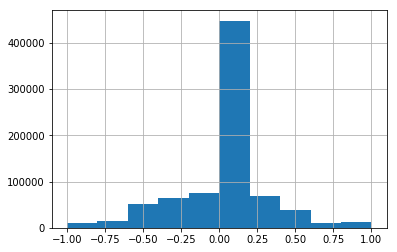

In [77]:
import matplotlib.pyplot as plt
x['setiments'].hist()
plt.show()

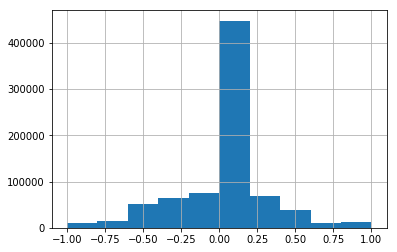

In [78]:
x['setiments'].hist()
plt.show()
positive = QnR[["text_x","setiments"]]> 0


In [79]:
df = QnR[QnR.setiments != 0]


In [80]:

df

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,setiments
0,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,-1.000000
1,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,-1.000000
2,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,-1.000000
3,115713,Tue Oct 31 19:56:01 +0000 2017,115714 yall lie great connection 5 bars lte st...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,0.800000
5,115716,Tue Oct 31 22:01:35 +0000 2017,actually thats broken link sent incorrect info...,Ask_Spectrum,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,-0.200000
6,115717,Tue Oct 31 22:06:54 +0000 2017,yo ask_spectrum customer reps super nice imma ...,Ask_Spectrum,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",0.466667
7,115718,Tue Oct 31 22:06:56 +0000 2017,picture ask_spectrum pretty much every day pay...,Ask_Spectrum,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...,0.225000
8,115719,Tue Oct 31 22:10:46 +0000 2017,somebody verizonsupport meeeeee worst luck cus...,VerizonSupport,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...,-1.000000
11,115723,Tue Oct 31 19:54:51 +0000 2017,115722 worst isp ive ever,VerizonSupport,Tue Oct 31 19:57:30 +0000 2017,@115723 What did we do to make you feel this w...,-1.000000
14,115728,Tue Oct 31 22:03:38 +0000 2017,chipotletweets 28 dont fit veggie burrito cost...,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,@115728 I still think you look great! -Becky,0.400000


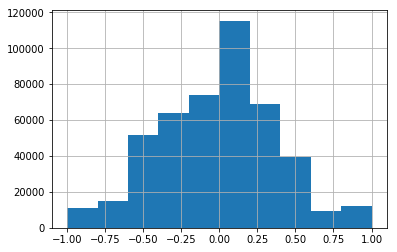

In [81]:
import matplotlib.pyplot as plt
df['setiments'].hist()
plt.show()

In [82]:
df

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,setiments
0,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,-1.000000
1,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,-1.000000
2,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,-1.000000
3,115713,Tue Oct 31 19:56:01 +0000 2017,115714 yall lie great connection 5 bars lte st...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,0.800000
5,115716,Tue Oct 31 22:01:35 +0000 2017,actually thats broken link sent incorrect info...,Ask_Spectrum,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,-0.200000
6,115717,Tue Oct 31 22:06:54 +0000 2017,yo ask_spectrum customer reps super nice imma ...,Ask_Spectrum,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",0.466667
7,115718,Tue Oct 31 22:06:56 +0000 2017,picture ask_spectrum pretty much every day pay...,Ask_Spectrum,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...,0.225000
8,115719,Tue Oct 31 22:10:46 +0000 2017,somebody verizonsupport meeeeee worst luck cus...,VerizonSupport,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...,-1.000000
11,115723,Tue Oct 31 19:54:51 +0000 2017,115722 worst isp ive ever,VerizonSupport,Tue Oct 31 19:57:30 +0000 2017,@115723 What did we do to make you feel this w...,-1.000000
14,115728,Tue Oct 31 22:03:38 +0000 2017,chipotletweets 28 dont fit veggie burrito cost...,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,@115728 I still think you look great! -Becky,0.400000


In [83]:
#def sentiment_type(value):
   # if value > 0:
   #     return "Positive"
   # elif value < 0:
    #    return "Negitive"
   # else:
    #    return "Neutral"

In [84]:
#QnR["setiments"] = QnR["setiments"].apply(sentiment_type)



In [85]:
#QnR["setiments"].value_counts()

In [86]:
#QnR["setiments"].value_counts().plot(kind = "bar",color = ["blue","red","green"])
#plt.title("Sentiment types classification frequency")
#plt.xlabel("Sentiment Types")
#plt.ylabel("Frequency")
#plt.xticks(rotation = "0.5")


In [87]:
#df["setiments"] = df["setiments"].apply(sentiment_type)

In [88]:

#df["setiments"].value_counts()

In [89]:
#df["setiments"].value_counts().plot(kind = "bar",color = ["blue","red","green"])
#plt.title("Sentiment types classification frequency")
#plt.xlabel("Sentiment Types")
#plt.ylabel("Frequency")
#plt.xticks(rotation = "0.5")


In [90]:
QnR

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,setiments
0,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,-1.000000
1,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,-1.000000
2,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,-1.000000
3,115713,Tue Oct 31 19:56:01 +0000 2017,115714 yall lie great connection 5 bars lte st...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,0.800000
4,115715,Tue Oct 31 22:03:34 +0000 2017,115714 whenever contact customer support tell ...,sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,0.000000
5,115716,Tue Oct 31 22:01:35 +0000 2017,actually thats broken link sent incorrect info...,Ask_Spectrum,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,-0.200000
6,115717,Tue Oct 31 22:06:54 +0000 2017,yo ask_spectrum customer reps super nice imma ...,Ask_Spectrum,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",0.466667
7,115718,Tue Oct 31 22:06:56 +0000 2017,picture ask_spectrum pretty much every day pay...,Ask_Spectrum,Tue Oct 31 22:10:08 +0000 2017,@115718 I apologize for the inconvenience. I w...,0.225000
8,115719,Tue Oct 31 22:10:46 +0000 2017,somebody verizonsupport meeeeee worst luck cus...,VerizonSupport,Tue Oct 31 22:13:33 +0000 2017,@115719 Help has arrived! We are sorry to see ...,-1.000000
9,115720,Tue Oct 31 22:12:16 +0000 2017,verizonsupport friend without internet need pl...,VerizonSupport,Tue Oct 31 22:13:30 +0000 2017,@115720 Have your friend message us.\n^ACM,0.000000


In [95]:
n_samples = 300
val_and_test_prop = 0.07
val_and_test_size = int(n_samples * val_and_test_prop)
n_samples += val_and_test_size * 2
twcs = tweets.sample(n=n_samples, random_state=345)

In [96]:
from keras.models import Sequential
import ast
import datetime
from gensim.models import Word2Vec
import io
from keras import backend as K
from keras import regularizers
from keras.layers import LSTM, GRU, GRUCell, Dense, Flatten, TimeDistributed
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import porter
#from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import string

df = df.sample(n=n_samples, random_state=235)

x_train = df["text_x"].apply(lambda x: x.split(' '))
y_train = df["setiments"]

x_train, x_val, y_train, y_val = \
    train_test_split(df["text_x"],  df["setiments"],
                     test_size=val_and_test_size,
                     random_state=3135,
                     shuffle=True)

x_train, x_test, y_train, y_test = \
    train_test_split(x_train, y_train,
                     test_size=val_and_test_size,
                     random_state=3135,
                     shuffle=True)
start = datetime.datetime.now()
x_train.reset_index(inplace=True, drop=True)
x_val.reset_index(inplace=True, drop=True)
x_test.reset_index(inplace=True, drop=True)
print('split time: ' + str(datetime.datetime.now() - start))

split time: 0:00:00


In [97]:
x_val.shape

(21,)

In [98]:
x_train.reset_index(inplace=True, drop=True)
x_val.reset_index(inplace=True, drop=True)
x_test.reset_index(inplace=True, drop=True)

def to_unique_words(seq, idfun=None):
   # order preserving
   if idfun is None:
       def idfun(x): return x
   seen = {}
   result = []
   for sent in seq:
       for item in sent:
           marker = idfun(item)
           if marker in seen: continue
           seen[marker] = 1
           result.append(item)
   return result


unique_words = to_unique_words(x_train)
vocab_size = len(unique_words)

# convert x to sequence data
sent_len = x_train.apply(len)
max_sent_len = np.max(sent_len)
print('\nmax_steps: ' + str(max_sent_len))

padding='post'
def to_token(x, vocab_size, max_len, padding):
    # x = x.apply(lambda s: ' '.join(s))
    x = [one_hot(w, vocab_size) for w in x]
    return pad_sequences(x, maxlen=max_len, padding=padding)

start = datetime.datetime.now()
x_train = to_token(x=x_train, vocab_size=vocab_size, max_len=max_sent_len, padding=padding)
x_val = to_token(x=x_val, vocab_size=vocab_size, max_len=max_sent_len, padding=padding)
x_test = to_token(x=x_test, vocab_size=vocab_size, max_len=max_sent_len, padding=padding)
print('to_token time:' + str(datetime.datetime.now() - start))

def plot_training_results(metric, history, nn, x_test, y_test):
    test_loss = nn.evaluate(x=x_test, y=y_test)
    test_result = test_loss if metric == 'loss' else test_acc

    plt.figure(figsize=(8*1.5, 6*1.5))
    plt.plot(history.history[metric], label='train')
    plt.plot(history.history['val_' + metric], label='val')
    plt.legend()
    plt.title(metric.title() + ' by Epoch    |    Test ' + metric.title() + ': ' + str(round(test_result, 3)))
    plt.show()

# y = y_test
# x=x_test
# nn=model



max_steps: 249
to_token time:0:00:00.012963


In [99]:
def plot_confusion_matrix(x, y, nn):
    y = np.argmax(y, axis=1)
    y_hat = nn.predict(x=x)
    y_hat = np.argmax(y_hat, axis=1)

    f1 = np.round(f1_score(y, y_hat, average='micro'), 3)

    conf_matrix = np.log(1 + confusion_matrix(y_true=y, y_pred=y_hat))
    # conf_matrix = confusion_matrix(y_true=y, y_pred=y_hat)

    plt.figure(figsize=(8 * 1.5, 6 * 1.5))
    sns.heatmap(conf_matrix, center=np.median(conf_matrix))
    plt.title('Confusion Matrix (1 + log of count)    |    F1: ' + str(f1))
    plt.show()

In [100]:
from keras.models import Sequential
# define sequential model
batch_size = 2**7
embed_size = 300
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embed_size, input_length=max_sent_len))
lstm_model.add(LSTM(200, return_sequences=True, stateful=False))
lstm_model.add(LSTM(100, return_sequences=False, stateful=False))
lstm_model.add(Dense(100))
lstm_model.add(Dense(100))
lstm_model.add(Dense(50))
lstm_model.add(Dense(1))
# compile the model
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')
# summarize the model
print(lstm_model.summary())
# fit the model
loss = []
val_loss = []

verbose = 1
train_minutes = 2
start = datetime.datetime.now()
while datetime.datetime.now() - start < datetime.timedelta(minutes=train_minutes):
    history = lstm_model.fit(x=x_train, y=y_train, validation_data=[x_val, y_val],
                             epochs=1, batch_size=batch_size, shuffle=True, verbose=verbose)

    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
   

history.history['loss'] = np.array(loss).ravel()
history.history['val_loss'] = np.array(val_loss).ravel()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 249, 300)          12300     
_________________________________________________________________
lstm_1 (LSTM)                (None, 249, 200)          400800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total para

21/21 [==============================] - 0s 8ms/step


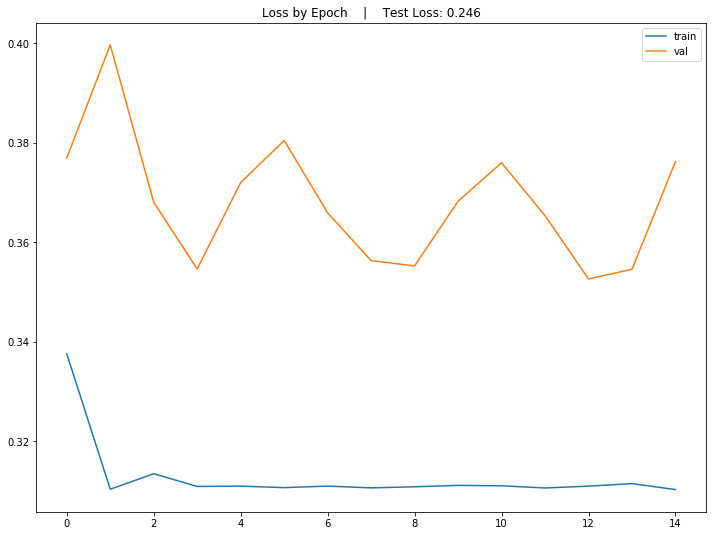

In [101]:
plot_training_results(metric='loss', history=history, nn=lstm_model, 
                      x_test=x_test, y_test=y_test.values)

In [102]:
lstm_model.evaluate(x=x_test, y=y_test)

21/21 [==============================] - 0s 7ms/step


0.2457209974527359

In [ ]:
#STOOOOOOOOOOOOOOOOPPPPPPP